## MEGHA SHARMA

In [1]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #visualisation 
import seaborn as sns
from sklearn.model_selection import train_test_split #split data into training and validation
from sklearn.metrics import classification_report #to get precision and recall
from sklearn.linear_model import LogisticRegression #algorithm to solve problem statement
from sklearn.preprocessing import StandardScaler #Scaling the data

In [2]:
#to ignore the warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Load the dataset
df = pd.read_csv("E:/vu post grad/sem4/tsc 125 HR dashboard/salarydata.csv")
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df = df.drop_duplicates()
df.shape

(29096, 14)

In [8]:
#target = df.pop('salary')

In [9]:
#stripping th ecolumn name of whitespaces
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [10]:
#UNIQUE OCCURENCE OF EACH VARIABLE
for i in df.columns:
    print(i,':',len(df[i].unique()),'\n')

age : 73 

workclass : 9 

education : 16 

education-num : 16 

marital-status : 7 

occupation : 15 

relationship : 6 

race : 5 

sex : 2 

capital-gain : 119 

capital-loss : 92 

hours-per-week : 94 

native-country : 42 

salary : 2 



In [11]:
#unique values in each column
for col in df.columns:
     print('{}:{}'.format(col,df[col].unique()))

age:[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass:['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education:['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num:[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status:['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation:['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship:['

In [12]:
#we will drop columns which do not provide us any info
df = df.drop(['capital-loss','capital-gain'],axis = 1)

### DATA CLEANING

In [13]:
#Since we found '?' in columns occupation, workclass, and native-country
#we remove the records that contains the question mark '?' for all 3 of these variables
df = df.drop(df.loc[(df['occupation'] == '?') & (df['workclass'] == '?') & (df['native-country'] == '?')].index)
df.shape
#we removed 27 records

(29069, 12)

In [14]:
##'workclass'
df['workclass'] = df['workclass'].replace('Local-gov','State-gov')
df['workclass'] = df['workclass'].replace('?','Not_classified')

##'marital-status'
df['marital-status'] = df['marital-status'].replace('Married-civ-spouse','civilian spouse')
df['marital-status'] = df['marital-status'].replace('Married-spouse-absent','Absent spouse')
df['marital-status'] = df['marital-status'].replace('Married-AF-spouse','Armforces spouse')

##'occupation'
df['occupation'] = df['occupation'].replace('?','Not_classified')

## native-country
df['native-country'] = df['native-country'].replace('?','Not_classified')
df['native-country'] = df['native-country'].replace('Hong','HongKong')


### Exploratory Data analysis

we are defining a function for count plot
def labeled_countplot(a):
    ax=sns.countplot(x=df[a])
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%\n'
       x = p.get_x() + p.get_width() / 2
      y = p.get_height()/2
        ax.annotate(percentage, (x,y), ha='center', va='center')
        plt.tight_layout()
        plt.show()
        return

def labeled_bar(a):
    sns.set(style="ticks")
    ax=sns.barplot(x=data_sal[a],y=data_sal['salary'],color='b')
    plt.grid(color='b',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return


plt.title("Salary VS Age")
labeled_bar('age')

### Uni-Variate Analysis

In [15]:
# we will add a new feature age group
df['age_group'] = pd.cut(df['age'],[10,30,50,70,90],4,labels= ['10-30','30-50','50-70','70-90'])

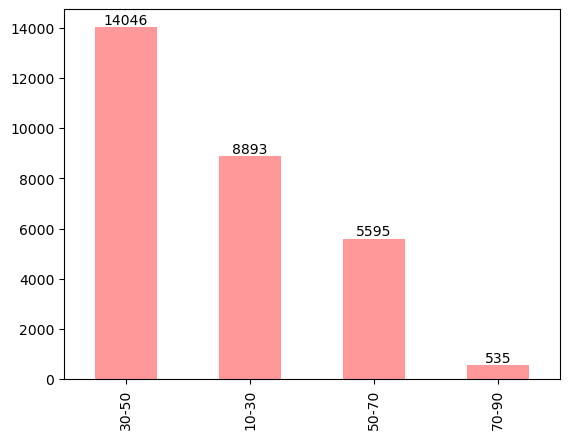

In [16]:
#checking the working class
ax = df['age_group'].value_counts().plot(kind = "bar",color = '#ff9999')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.rcParams['figure.figsize'] = (5,3)
plt.show()

The majority of subjects fall into the age group of 30-50, with a total of 14,058 individuals. The next largest age group is 10-30, with 8,903 individuals. The smallest age group is 70-90, with only 536 individuals. This data suggests that the population of the study is primarily composed of middle-aged individuals, with a smaller proportion of younger individuals and very few seniors.

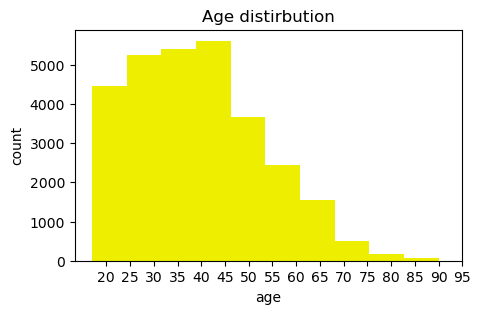

In [17]:
# check age distribution
plt.hist(df['age'],color =  '#EEEE00')
plt.xlabel('age')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,4)
plt.title("Age distirbution")
plt.xticks(np.arange(20,100,5))
plt.show()

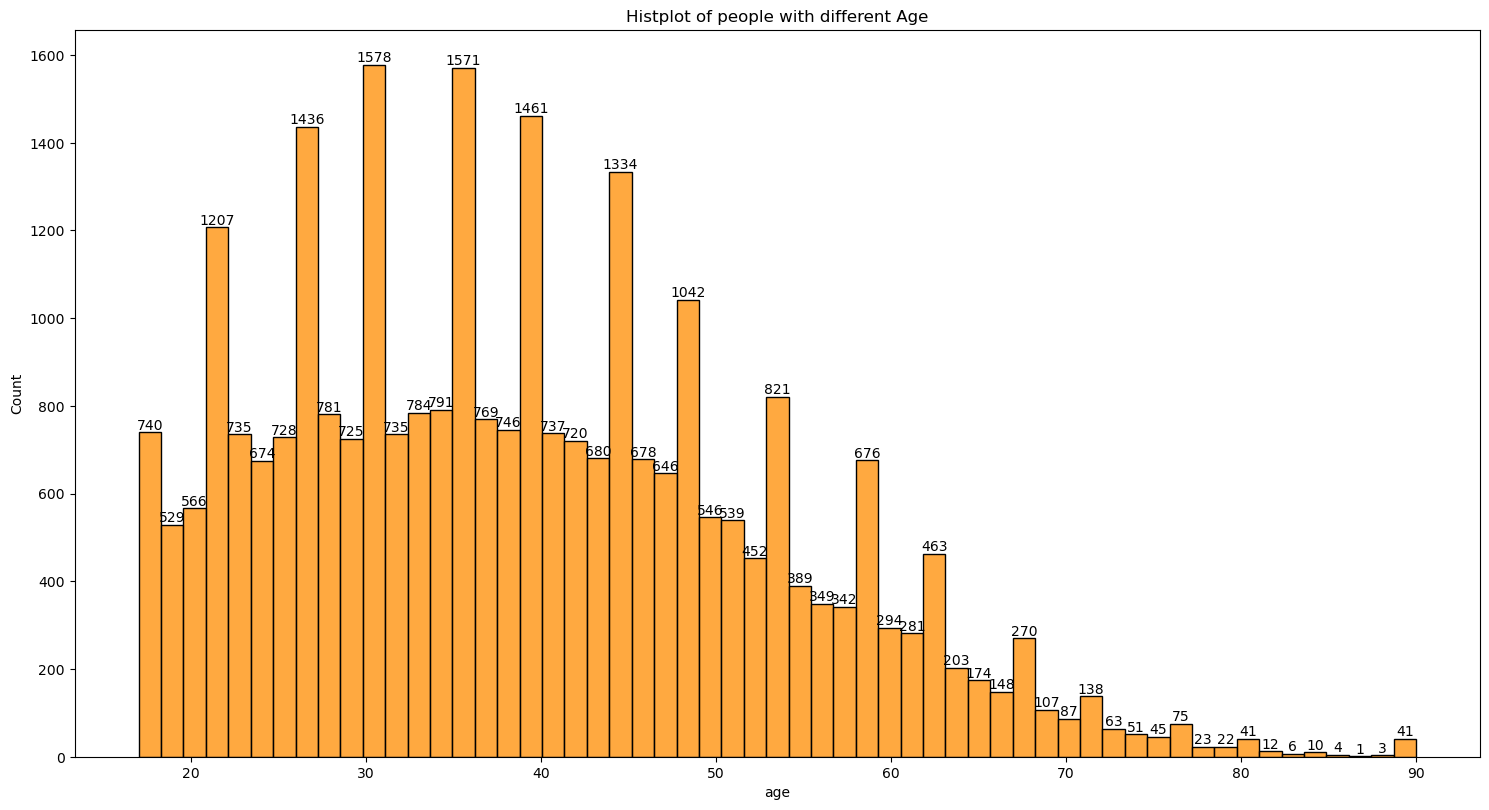

In [18]:
plt.figure(figsize=(15,8))
ax=sns.histplot(df['age'],color='darkorange')
for p in ax.patches: 
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.tight_layout()
plt.title('Histplot of people with different Age')
plt.show()

Based on the Age column analyzed, it can be concluded that the majority of the population falls within the age range of 20 to 45 years.Out of these 1578,People are of age 30 and second highest come from people around age 35.
This can be seen in the bar chart that displays the distribution of ages, which shows a significant peak within this age range, followed by a gradual decline as age increases.

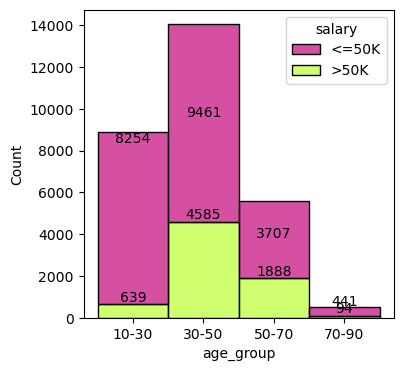

In [19]:
import seaborn as sns
c = ['#C71585','#C0FF3E']
ax = sns.histplot(binwidth=0.5, x= 'age_group', hue= 'salary' , data=df, stat="count",palette = c, multiple="stack")

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.rcParams['figure.figsize'] = (5,3)
plt.show()


##### How does age  level play role in salary determination

The data suggests that there is a considerable difference in income levels within different age groups. In the age group of 10-30, a small proportion of individuals (approximately 640 people) earn more than 50000, while the majority (approximately 8263 people) earn less than this amount. Similarly, in the age group of 30-50, a significant proportion (approximately 4587 people) earn more than 50000, while the remaining individuals (approximately 9471 people) earn less. Finally, in the age group of 70-90, only a small number of individuals (approximately 94 people) earn more than 50000, while the majority (approximately 442 people) earn less. This data suggests that age can have a significant impact on income levels, with middle-aged individuals earning higher salaries on average than younger or older individuals.

Age can play a significant role in salary determination, as it is often linked to factors such as experience and productivity. In many professions, it is common for individuals to see their salaries increase as they gain more experience and demonstrate their skills and abilities in the workplace. This is why middle-aged individuals, who have typically been in the workforce for several years and have gained significant experience, often receive higher salaries than younger or less experienced individuals.

On the other hand, it is not uncommon for salaries to decrease for individuals who are approaching retirement age or who have already retired. In some cases, this may be due to reduced productivity or decreased demand for their skills and expertise. As a result, senior citizens may receive lower salaries than their younger counterparts.

However, it is important to note that the relationship between age and salary is not always straightforward, and there are many other factors that can influence salary levels. 

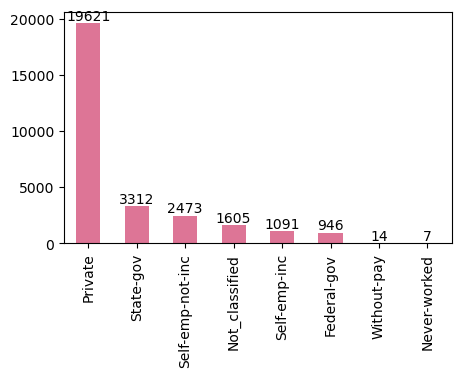

In [20]:
#checking the working class
ax = df['workclass'].value_counts().plot(kind = "bar",color = '#DD7596')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.rcParams['figure.figsize'] = (6,3)
plt.show()

19621 number of people work for private sector.The number of people working whether selfemployed or working for state government earn less than 5000.

The people who work for state government are 3312 in numbers.
Self emplyoed people not inc  and inc are total of     3564 and respectively there are 2473 and 1091 
around 1632 people havent classified which types of sectore they are a part of or whether they are employes or not
very less number of people work for federal government 946.
21 pay have either never worked or work without a pay

It seems that a large proportion of individuals working in the surveyed population belonged to the private sector, with a total of 19,621 individuals. Additionally, the data indicated that a significant portion of the surveyed individuals either worked for the state government (3,312 individuals) or were self-employed (3,564 individuals), with respective subsets of 2,473 and 1,091 individuals that belonged to inc or non inc.
Moreover, around 1,632 individuals were not classified based on their sector of employment or employment status. 

It is noteworthy that only a small fraction of the surveyed population worked for the federal government, with a total of 946 individuals.
Finally, 21 individuals reported having either never worked or worked without pay. 


These findings suggest that efforts to improve employment opportunities and wages could be focused on the private sector and the self-employed, while also considering the unique challenges and opportunities within the state and federal government sectors.

<Axes: title={'center': 'Salary VS workclass'}, xlabel='workclass', ylabel='count'>

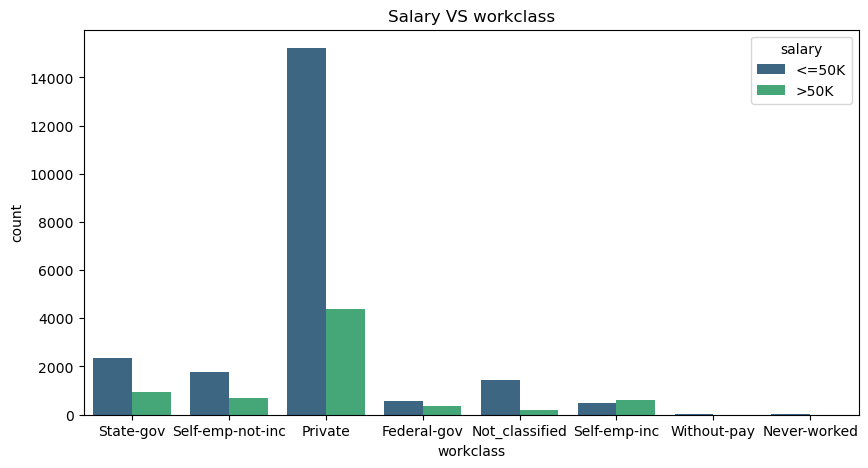

In [21]:
plt.figure(figsize=(10,5))

plt.title("Salary VS workclass")
sns.countplot(x='workclass',hue='salary',palette = "viridis",data=df)

##### How does workclass play role in salary determination

Some general factors that may affect the salaries of workers in each of the employment categories you listed:

People working in Private sector have the highest number of people earning More than 50000, Followed by state government 
State-gov: Salaries for state government employees can vary widely depending on the state, It can be influenced by factors such as the state's budget, union contracts, and political priorities.

Self-emp-not-inc: Their earnings may be more variable and dependent on factors such as the level of demand for their services and their ability to manage their business effectively.

Private: Salaries for private sector workers can be influenced by a variety of factors, such as the size and profitability of the company,ETC. Workers in industries with high demand for skilled labor, such as technology or finance, may earn higher salaries than workers in other industries.

Not_classified, Without-pay, Never-worked: These categories generally refer to people who are not currently employed or do not have a traditional employment arrangement. For these individuals, their income may be dependent on factors such as government assistance programs, support from family or friends, or savings.


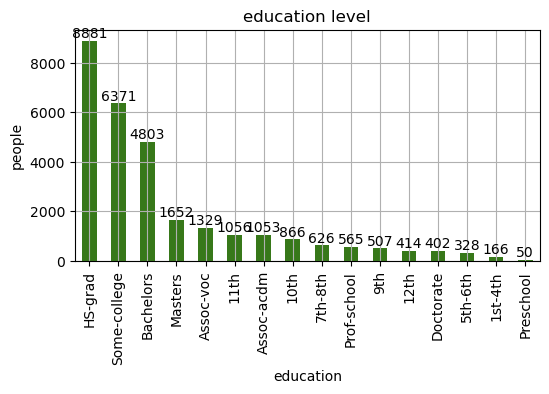

In [22]:
#Checking educational qualification

ax = df['education'].value_counts().plot(kind = "bar",color = '#377819')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')
    
plt.rcParams['figure.figsize'] = (7,4)
plt.xlabel('education')
plt.ylabel('people')
plt.title("education level")
plt.grid()
plt.show()

An analysis of the education column shows that the highest number of people in the surveyed population were high school graduates, with a total of 8,886 individuals. This was followed by individuals who had completed some college, with 6,378 individuals, and those with a bachelor's degree, with 4,810 individuals. The data also revealed that a significant number of individuals were pursuing their master's degree, with 1,653 individuals enrolled in such programs. Moreover, a considerable number of individuals had completed an associate degree, whether vocational or academic, with respective subsets of 1,331 and 1,053 individuals. Furthermore, a sizable number of individuals had completed their education until a certain grade level, ranging from 50 individuals who had attended preschool to 1,056 individuals who had completed only until 11th grade. 

Efforts to promote education and training programs that align with the interests and aspirations of the surveyed population could provide opportunities for personal and professional growth.

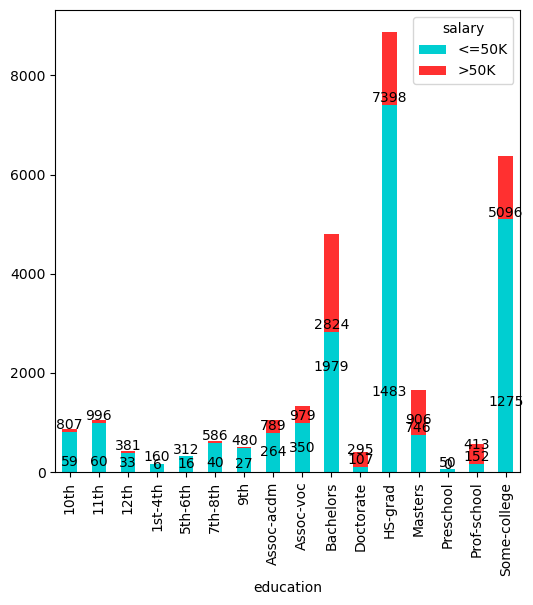

In [23]:
# plotting graph salary vs education

plt.rcParams['figure.figsize'] = (6,6)
c = ['#00CED1','#FF3030']
ax = pd.crosstab(df['education'], df['salary']).plot(kind="bar",color = c,stacked = True)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')


##### How does education level play role in salary determination

Most of the people with salary >50K ,belongs to students being a high school graduate or belonging to some college,pursuing a bachelor.
Most of the people with salary <=50K ,belongs to students being a Masters,associate academic or vocational 

Lowest people with salary >50K ,belongs to students having a doctorate,PReschool
Most of the people with salary <=50K ,belongs to students being a who have very less education .

Generally, the higher the level of education an individual has, the more likely they are to earn a higher salary.

One reason for this is that higher levels of education tend to lead to specialized skills and knowledge, which are often in high demand in the job market. For example, individuals with advanced degrees such as master's may have highly specialized knowledge which can lead to high-paying positions in these fields.

Moreover, education level can also be a signal of an individual's ability, potential, and commitment to their career. Employers may perceive individuals with higher levels of education as more competent and capable, which can lead to higher salaries and opportunities for career advancement.

However, it is important to note that the relationship between education level and salary is not always straightforward, as other factors such as occupation, industry, and experience can also influence salary levels. 

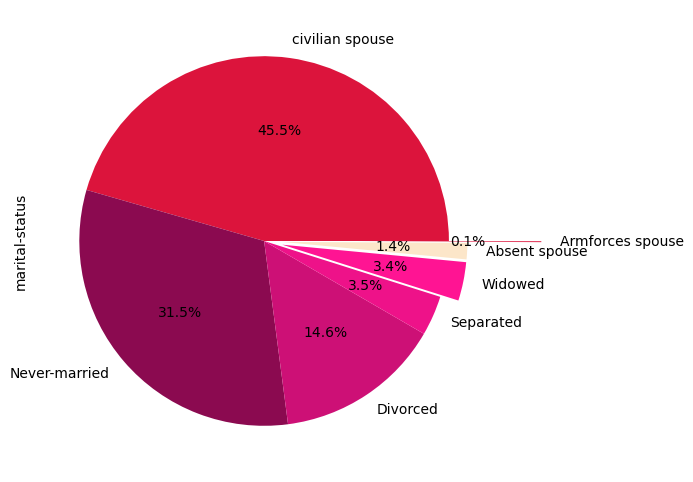

In [24]:
#Checking marital status
myExplode = (0, 0, 0,0,0.1,0.1,0.5)
s = ['#DC143C','#8B0A50','#CD1076','#EE1289','#FF1493','#FCE6C9']
total = df.shape[0]
df['marital-status'].value_counts().plot(kind = "pie",autopct='%1.1f%%',colors = s,explode=myExplode)
plt.rcParams['figure.figsize'] = (6,6)
plt.show()

Based on the analysis of the marital stauts, it can be concluded that the majority of the surveyed population was married, comprising 45.5% of the total subjects. Additionally, a significant proportion of individuals had never been married, accounting for 31% of the sample. Furthermore, 14.6% of the surveyed individuals were divorced, while 3.5% were separated, and 3.4% were widowed. A small portion of the population had absent spouses, with 1.4% of the sample, and 0.1% had spouses in the armed forces. These findings suggest that marital status is an important demographic factor that should be taken into account when developing policies or programs that aim to target specific segments of the population. Further research could investigate the underlying factors contributing to the observed patterns in marital status and identify potential opportunities for intervention or support programs.



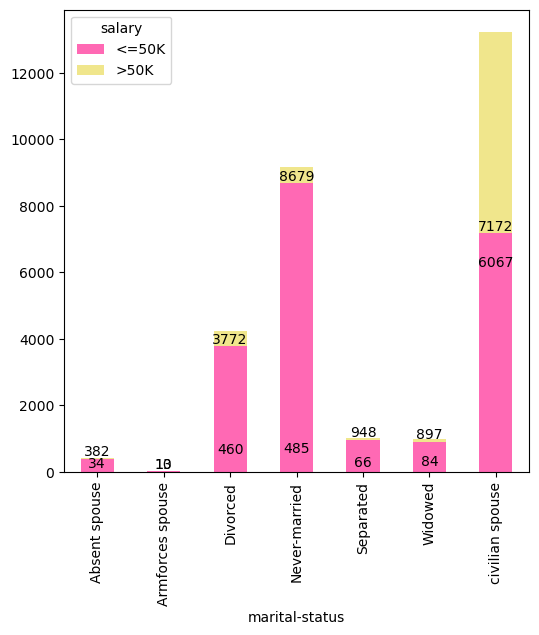

In [25]:
# plotting graph salary vs marital-status

plt.rcParams['figure.figsize'] = (6,6)
c = ['#FF69B4','#F0E68C']
ax = pd.crosstab(df['marital-status'], df['salary']).plot(kind="bar",color = c,stacked = True)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')


##### How does marital status play role in salary determination
Marital status can potentially play a role in salary determination in both government jobs, private sector jobs, and self-employment, but the nature and extent of the relationship may vary depending on the specific context and factors involved.

The impact of marital status on salary determination in the private sector may be influenced by gender and race, with some groups experiencing larger wage penalties or premiums for being married or unmarried.

In self-employment, marital status may play a role in income determination through factors such as access to capital and family responsibilities. For example, married individuals may have access to shared resources and support networks that could enhance their ability to start or grow a business. On the other hand, self-employed individuals with family responsibilities may face challenges balancing work and family obligations, which could impact their income levels.

Overall, the impact of marital status on salary determination in government jobs, private sector jobs, and self-employment is complex and context-specific, and may be influenced by a range of factors beyond marital status alone.

For eg civilian spouse are the people with highest salary,majority of them earning greater than 50k(around 7178)
After that there comes people who are never married , approximately 8688 people among them earn greater than 50 k
and hten comes around 3777 divorced people who earn more than 50k
In government jobs, marital status may impact salary determination through factors such as employee benefits and tax incentives. For example,Some government jobs may require relocation or travel, which could be influenced by marital status and family obligations.

When it comes to people earning less than 50K ,most people are civilian spouse divorced or never married.

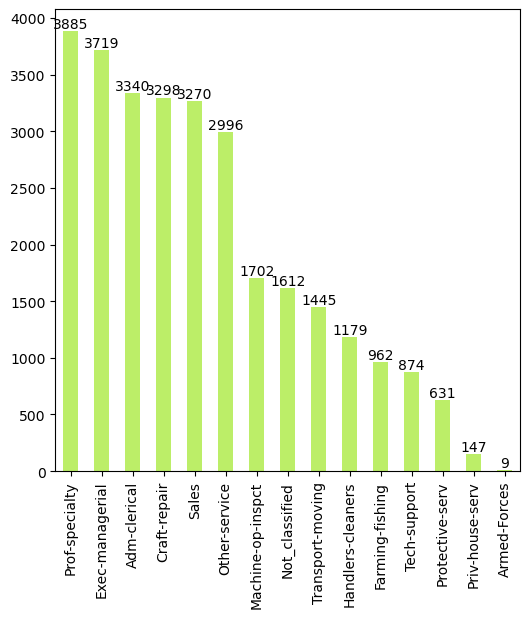

In [26]:
#Occupation 
ax = df['occupation'].value_counts().plot(kind = 'bar',color = '#BCEE68')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.rcParams['figure.figsize'] = (6,3)
plt.show()


According to the data, it appears that the occupations of professors, managerial level executives, and administrative clerks have the highest representation among the subjects, with 3885, 3719, and 3340 individuals respectively. In contrast, the occupations of private house servants, armed forces personnel, and protective service workers have the lowest representation among the subjects.



plt.rcParams['figure.figsize'] = (6,6)
c = ['#228B22','#B0B0B0']
ax = pd.crosstab(df['occupation'], df['salary']).plot(kind="bar",color = c,stacked = True)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')

    


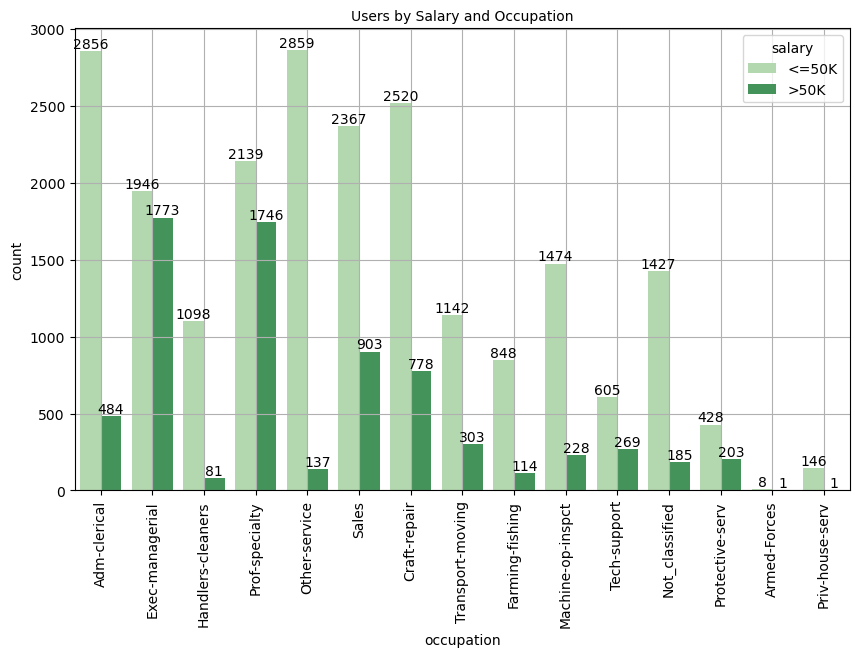

In [27]:
# plotting graph salary vs occupation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='occupation',hue='salary',data=df,palette="Greens")
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.title("Users by Salary and Occupation", fontsize = 10)
plt.xticks(rotation = 90)
plt.grid()

Based on the data, it is observed that professors, managerial level executives, and administrative clerks have the highest number of subjects and earn the most. The highest salary difference is observed in the occupation of Administrative clerks. Out of the total 3339 subjects working as administrative clerks, around 484 people earn less than 50000, while 2855 people earn more than 50000. In the occupation of professors, out of the total 3884 subjects, 2138 people earn more than 50000, while 1746 people earn less than 50000. Private house servants have the least number of subjects, and the maximum number of people who earn more than 50000 belong to the clerical admin occupation.

##### How does occupation play role in salary determination

Occupation plays a significant role in salary determination. Certain occupations are associated with high-paying sectors, such as finance, law, and healthcare, which typically offer higher salaries than other industries. Additionally, individuals with specialized skills or education in a specific field, such as doctors or engineers, may command higher salaries than those in general occupations. Factors such as experience, job responsibilities, and location can also impact salary within an occupation. In addition, the demand for a particular occupation may also play a role in salary determination, with higher demand often leading to higher salaries.

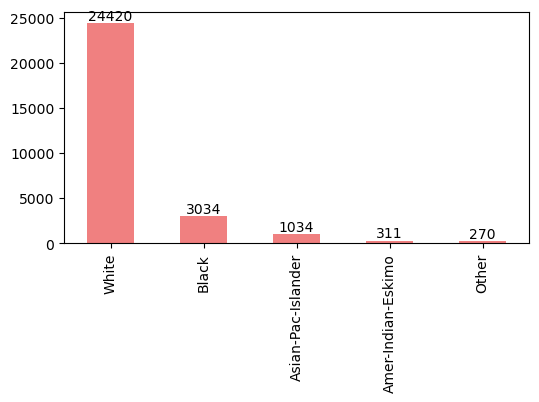

In [28]:
#Race
ax = df['race'].value_counts().plot(kind = 'bar',color = '#F08080')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.rcParams['figure.figsize'] = (5,4)
plt.show()


Ethnicity can play a role in salary determination, as evidenced by our dataset. The majority of our subjects are White (24438), followed by Black (3038). Least of the them belong to other categories that havent been specified.


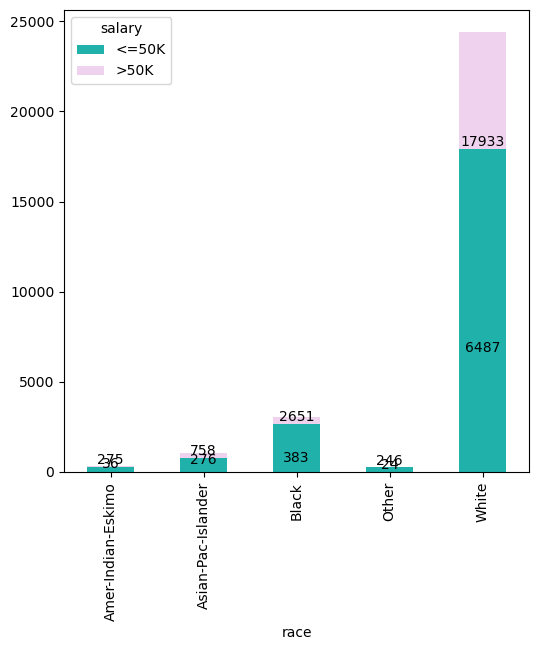

In [29]:
# plotting graph salary vs race

plt.rcParams['figure.figsize'] = (6,6)
c = ['#20B2AA','#EED2EE']
ax = pd.crosstab(df['race'], df['salary']).plot(kind="bar",color = c,stacked = True)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')


##### How does race play role in salary determination

It can be observed that ethnicity plays a significant role in determining salary, with a large majority of the subjects being white (24438) followed by black (3038). Among white people, around 17949 earn more than 50000 while 6489 of them earn less than 50000. On the other hand, only 25 people from other races earn less than 50000, which is defeated by American Indian Eskimos (36). Among blacks, 2654 subjects earn more than 50000 while 384 earn less than 50000 salary. These numbers suggest that ethnicity can impact salary determination, with certain ethnic groups having a higher likelihood of earning a higher salary than others.

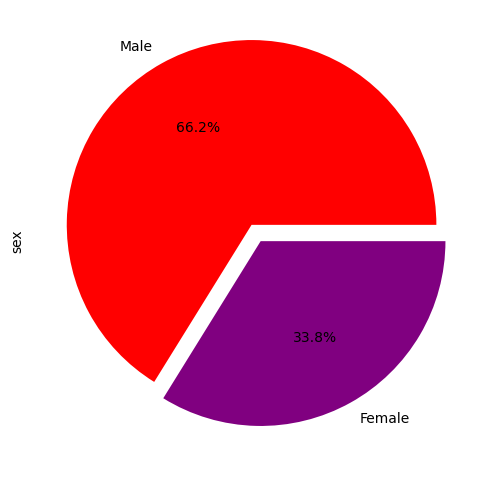

In [30]:
### sex 
myExplode = (0.1,0.001)
s = ['#FF0000','#800080']
total = df.shape[0]
df['sex'].value_counts().plot(kind = "pie",autopct='%1.1f%%',colors = s,explode=myExplode)
plt.rcParams['figure.figsize'] = (6,6)
plt.show()



Gender plays a significant role in determining salary, with a higher percentage of males in our subject population (66.1%) than females (33.9%). However, in industries such as technology or finance, men are often overrepresented and may have higher salaries compared to women in the same roles.
Therefore, gender can play a significant role in salary determination, and addressing gender-based pay disparities is important for promoting equality and fairness in the workplace.


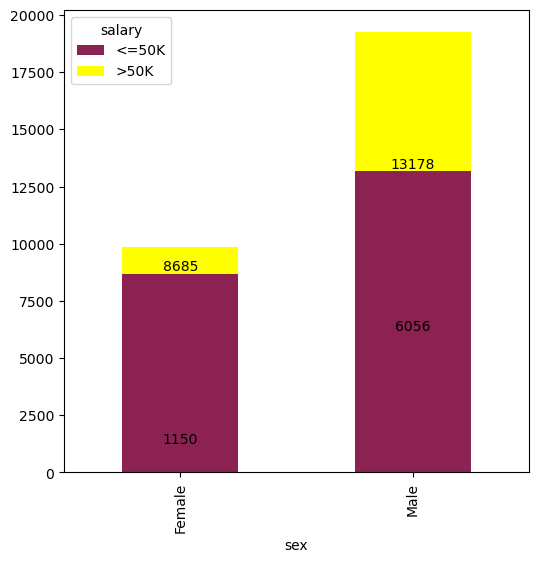

In [31]:
# plotting graph salary vs sex

plt.rcParams['figure.figsize'] = (6,6)
c = ['#8B2252','#FFFF00']
ax = pd.crosstab(df['sex'], df['salary']).plot(kind="bar",color = c,stacked = True)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')


##### How does Gender play role in salary determination

Gender can play a role in salary determination. Out of all our female subjects, 8698 females earn more than 50000, and 1152 earn less than 50000. Out of all our male subjects, 13188 males earn more than 50000, and 6058 earn less than 50000. 

{'whiskers': [<matplotlib.lines.Line2D at 0x19bd20872b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19bd20876d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bd2087010>],
 'medians': [<matplotlib.lines.Line2D at 0x19bd2087c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bd2087eb0>],
 'means': []}

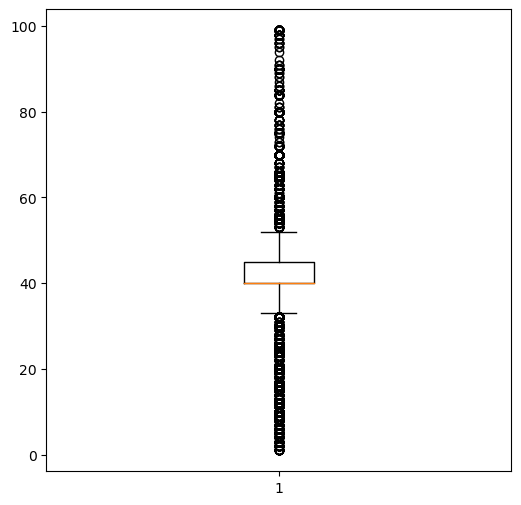

In [32]:
### hours-per-week
plt.boxplot(df['hours-per-week'])


Median working hours is 40 hrs per week that means 5 days per week


In [33]:
# we will add a new feature age group
df['hours_group'] = pd.cut(df['hours-per-week'],[0,20,40,60,80,100],5,labels= ['0-20','20-40','40-60','60-80','80-100'])

In [34]:
df['hours_group'].describe()

count     29069
unique        5
top       20-40
freq      17299
Name: hours_group, dtype: object

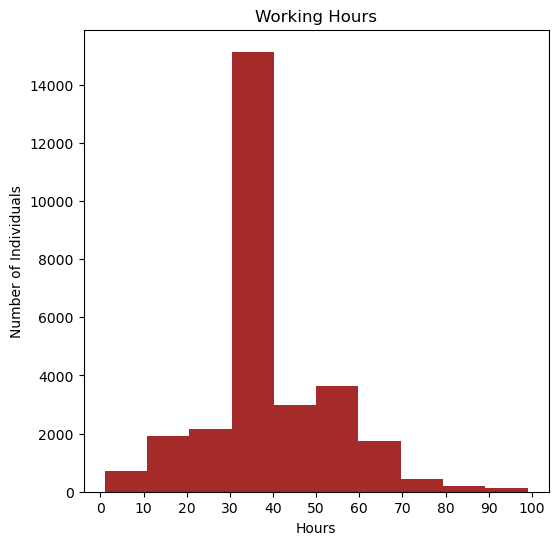

In [35]:
#checking hours-per-week

plt.hist(df['hours-per-week'],color = 'brown')
plt.xlabel('Hours')
plt.ylabel('Number of Individuals')
plt.xticks(np.arange(0,110,10))
plt.title('Working Hours')
plt.show()

Majority of the workplaces expect their employees to work for atleast 30-40 hrs per week ,followed by 50-60hrs per week.

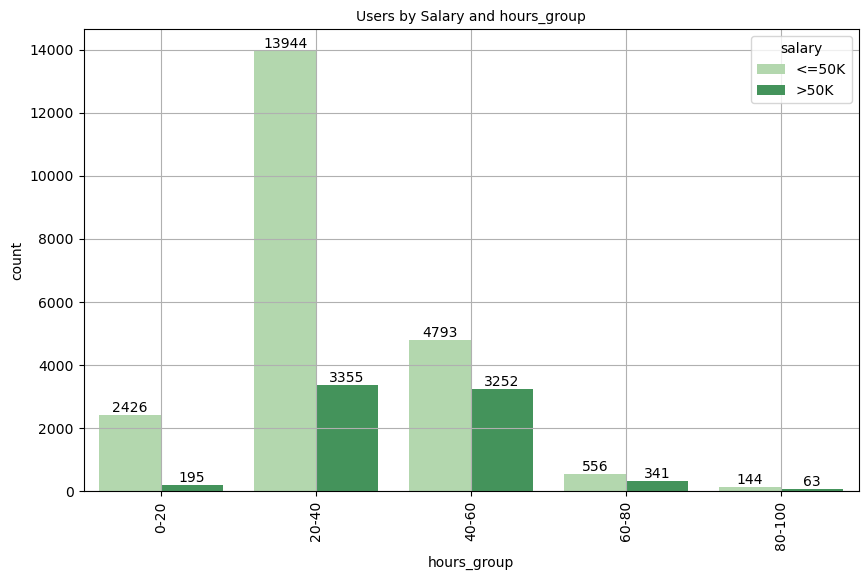

In [36]:
# plotting graph salary vs occupation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hours_group',hue='salary',data=df,palette="Greens")
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,
            ha='center', va='bottom')
    
plt.title("Users by Salary and hours_group", fontsize = 10)
plt.xticks(rotation = 90)
plt.grid()

#### How does Hours-per-week determine Salary
Hour per work is an important factor in determining salary for many jobs, as it directly affects the amount of time that an employee spends working and the amount of money they earn for that work. In general, the more hours a worker puts in, the higher their salary will be, assuming that they are paid hourly and not on a salary basis.

Approx 14000 employees work for around 20-40 hrs per week,Followed by approx 5000 people working for atleast 40-60 hrs per week.
Doesnt matter if they are earning more or less than 50000.

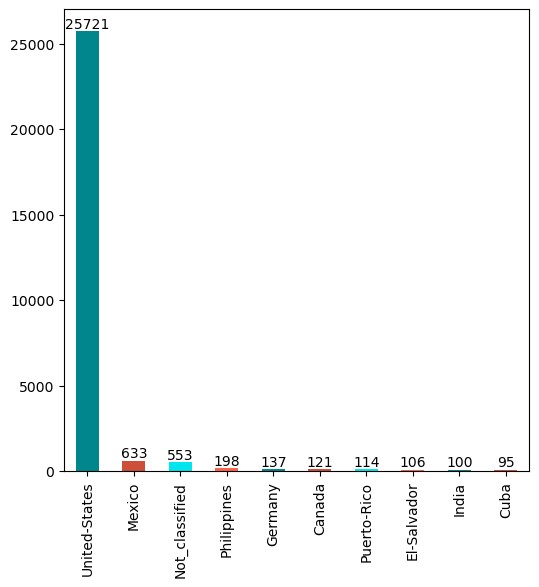

In [37]:
### Native country

plt.rcParams['figure.figsize'] = (6,6)

c = ['#00868B','#CD4F39','#00E5EE','#FF6347']
ax = df['native-country'].value_counts().head(10).plot(kind = 'bar',color = c)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')

Out of all our subjects, the majority of them, 25721 to be precise, belong to the United States. On the other hand, the least number of subjects belong to Cuba. We have 633 subjects from Mexico, 580 subjects who haven't mentioned their native country, and only 100 subjects from India. These numbers provide us with a diverse range of subjects from different countries, allowing us to analyze the impact of various factors such as occupation, ethnicity, and gender on salary determination across different regions.

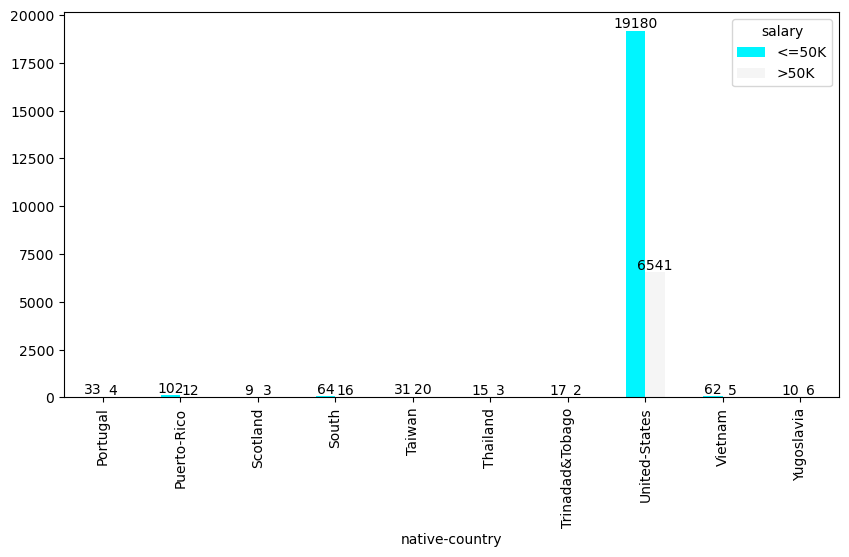

In [38]:
# plotting graph salary vs sex

plt.rcParams['figure.figsize'] = (10,5)
c = ['#00F5FF','#F5F5F5']
ax = pd.crosstab(df['native-country'], df['salary']).tail(10).plot(kind="bar",color = c,stacked = False,width=0.5)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0, '%d' % height,ha='center', va='bottom')

 

##### How does Native country play role in salary determination

As we can observe in the above graph,highest amount of subjects come form The US 6541 ,work for less than 50000 and 19180 work for greater than 50000.lowest subjects are from scotland.

Native country can play a role in determining the salary range due to factors such as differences in economic conditions, cultural norms, and education systems. For example, individuals from developed countries such as the United States may have higher salary expectations and may be able to negotiate higher salaries compared to individuals from developing countries with weaker economies. Additionally, different countries may have different education systems and qualifications that can affect the type of jobs available and the corresponding salary range.Overall, while native country may not be the sole determinant of salary range, it can play a significant role in shaping an individual's earning potential.

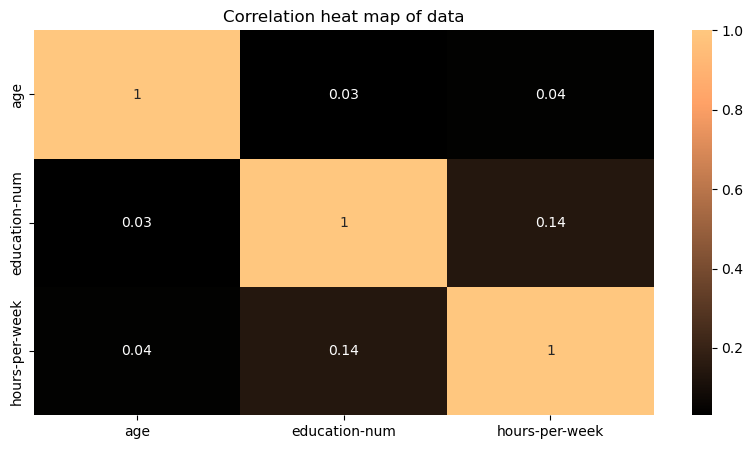

In [39]:
sns.heatmap(df.corr(),annot = True,cmap='copper')
plt.title('Correlation heat map of data')
plt.rcParams['figure.figsize']=(20,10)
plt.show()

## OUTLIERS

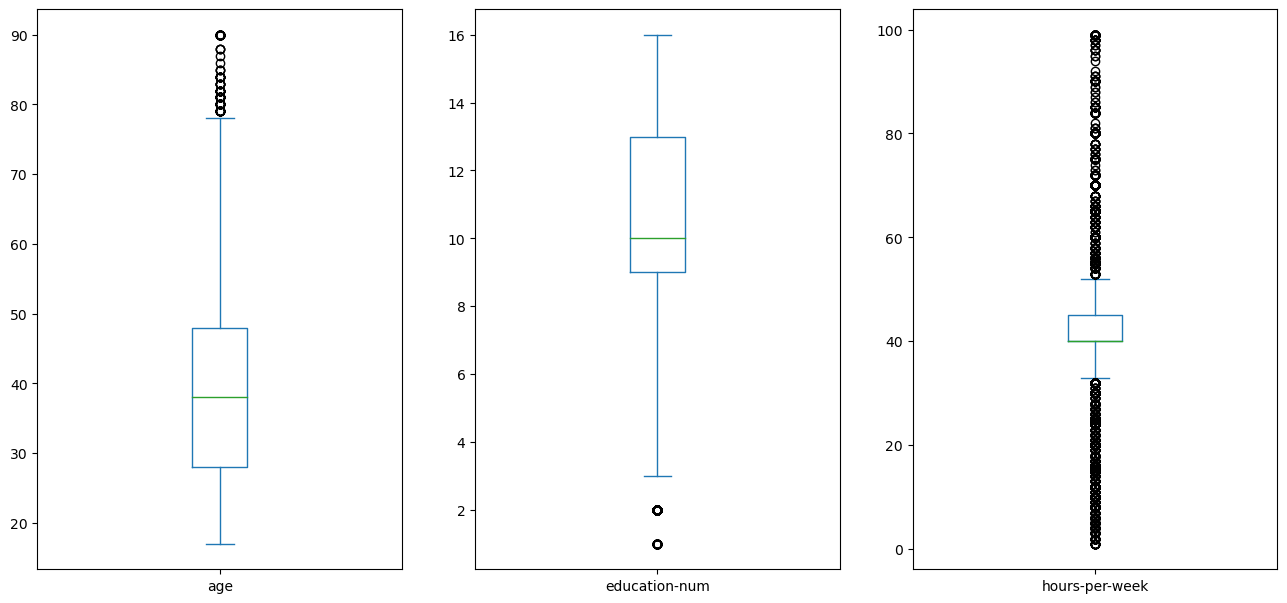

In [40]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(16,16));

From the figure it is clear that age and hours-per-week have outliers. So we should remove it.

In [41]:
# Identify the outliers and remove 
for i in ['age', 'hours-per-week']:
    Q1=df[i].quantile(0.25) # 25th quantile
    Q3=df[i].quantile(0.75) # 75th quantile
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[i] = np.clip(df[i], Lower_Whisker, Upper_Whisker)

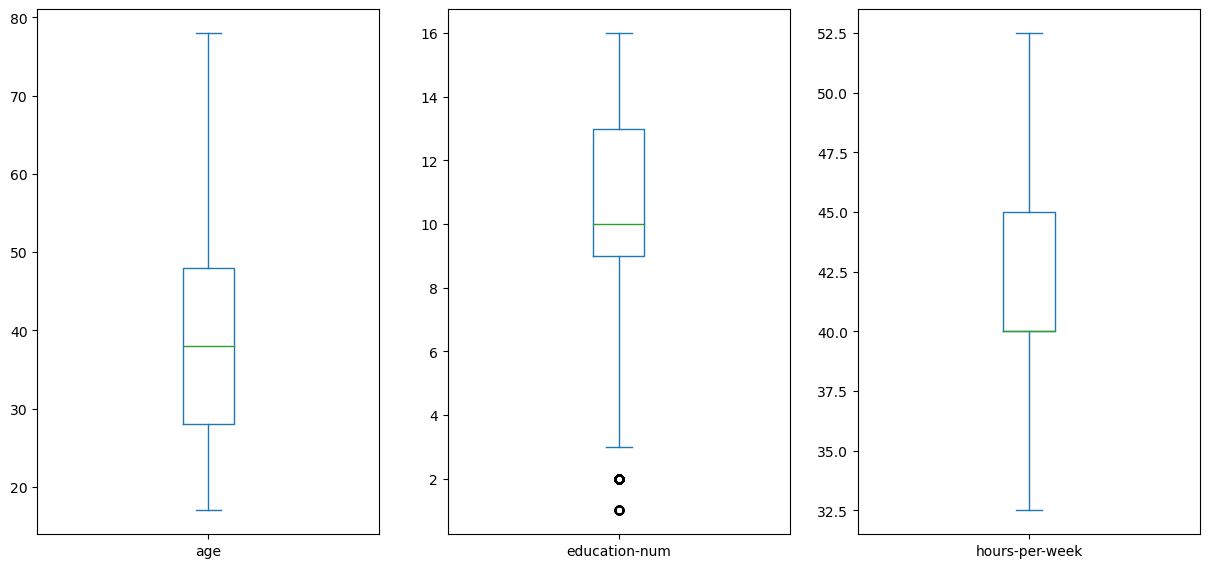

In [42]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(15,15));

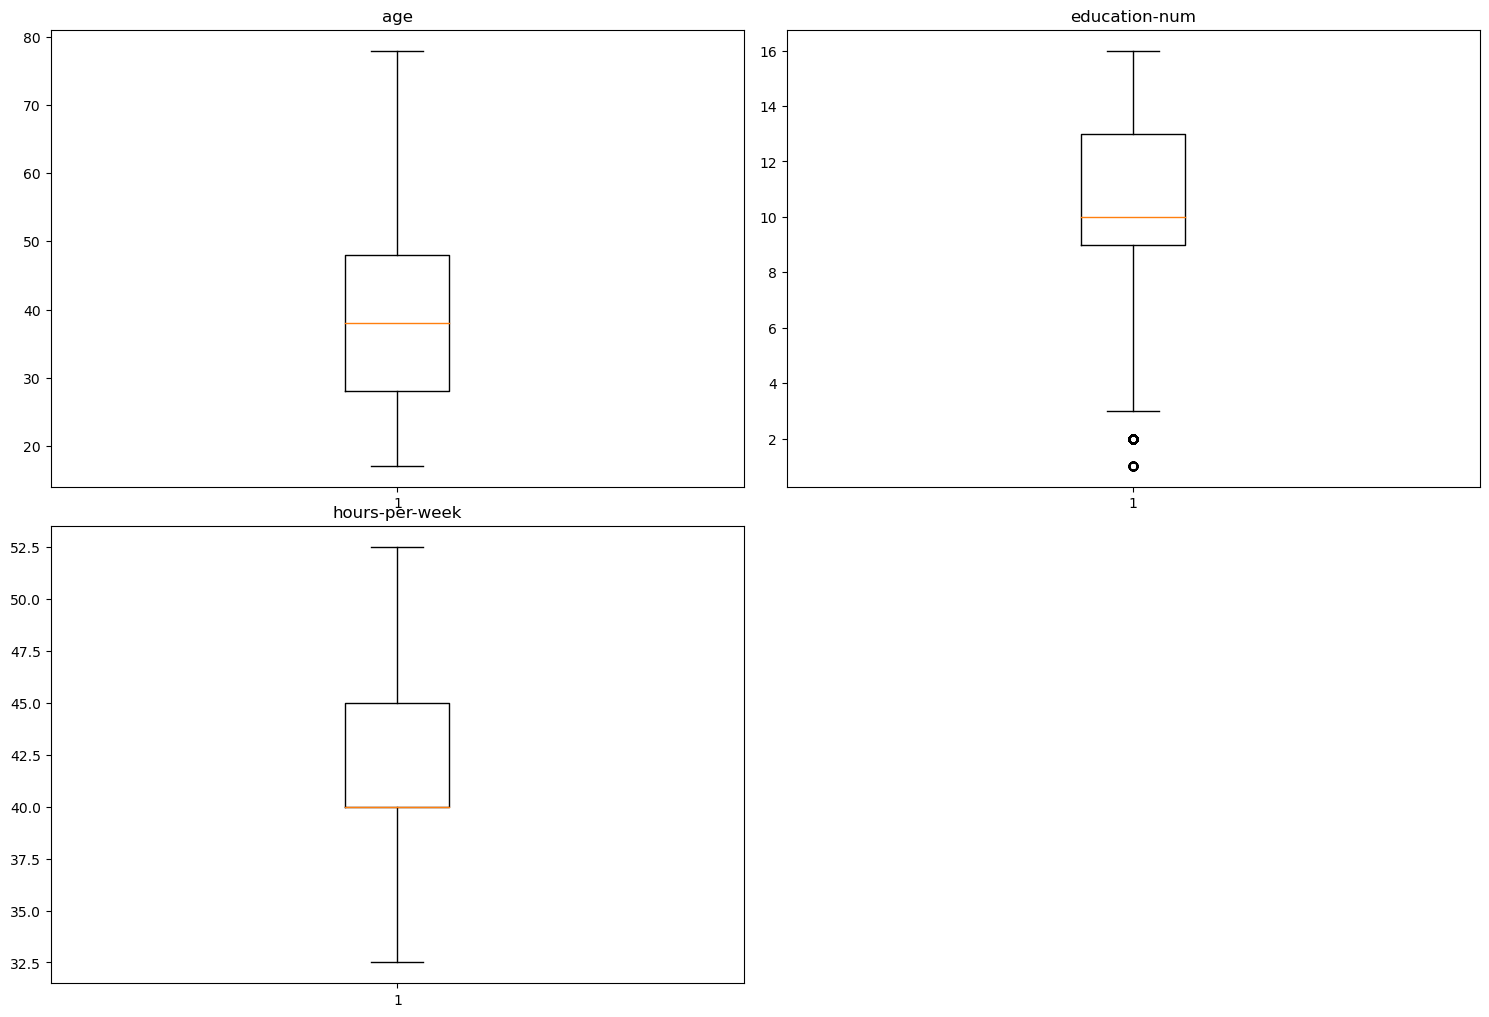

In [43]:
# Listing all mumerical value boxplots to find the outliers
#numerical_col = data.select_dtypes(include=np.number).columns.tolist()

data_sal_num = df.select_dtypes(['number'])

plt.figure(figsize=(15,15))

for i, variable in enumerate(data_sal_num):
                     plt.subplot(3,2,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [44]:
df.shape

(29069, 14)

In [45]:
#Outlier Handling for the attribute age
Q1=df['age'].quantile(0.25) # 25th quantile
Q3=df['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
df['age'] = np.clip(df['age'], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 


In [46]:
df.shape

(29069, 14)

In [47]:
#As we can see we did not find any outliers.So there we wont move forward in this direction anymore

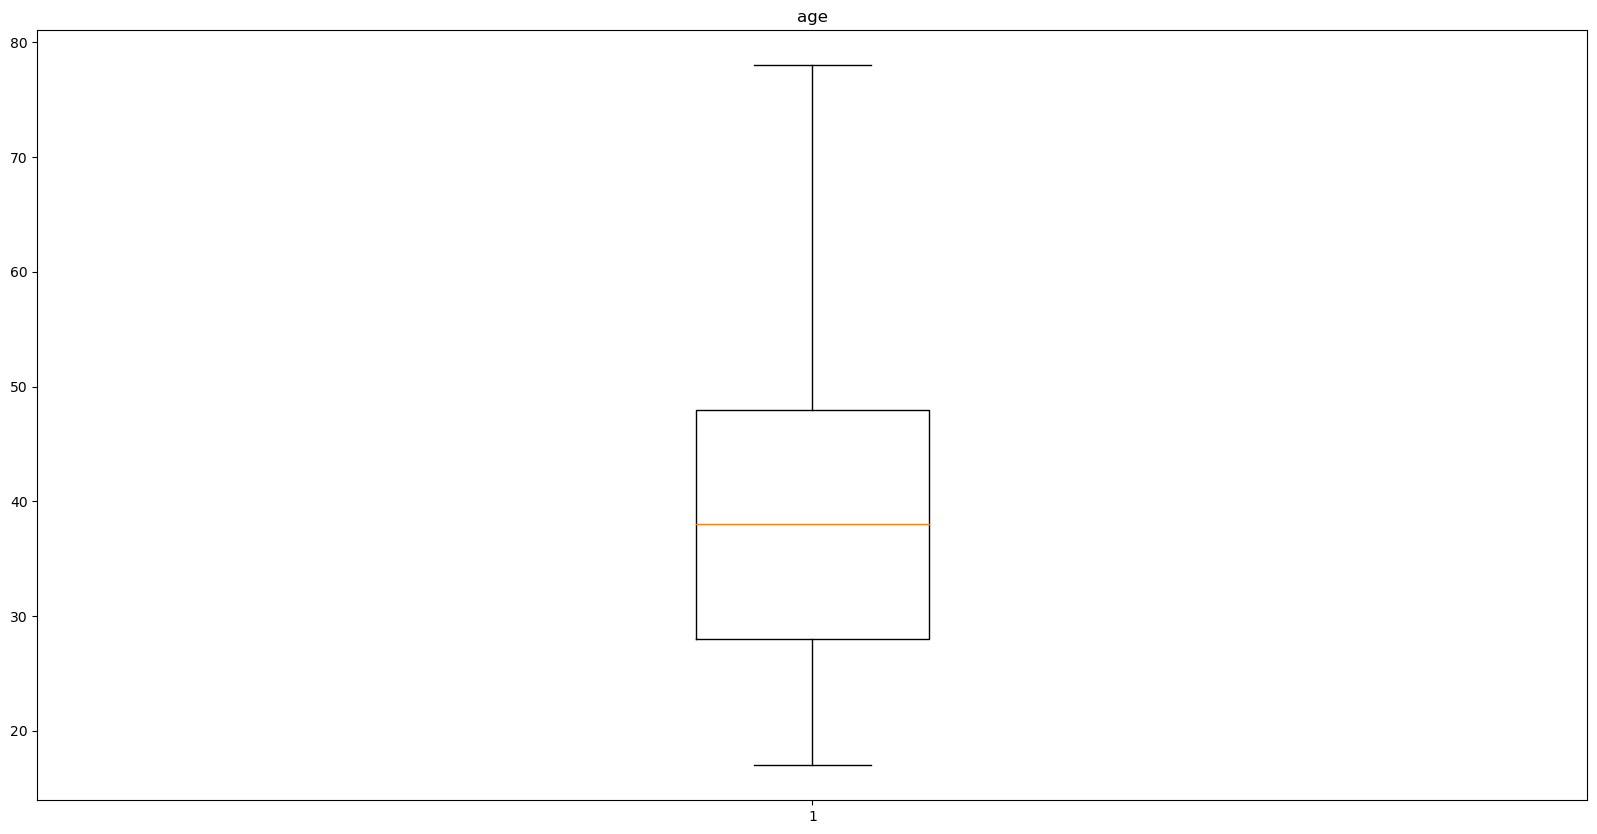

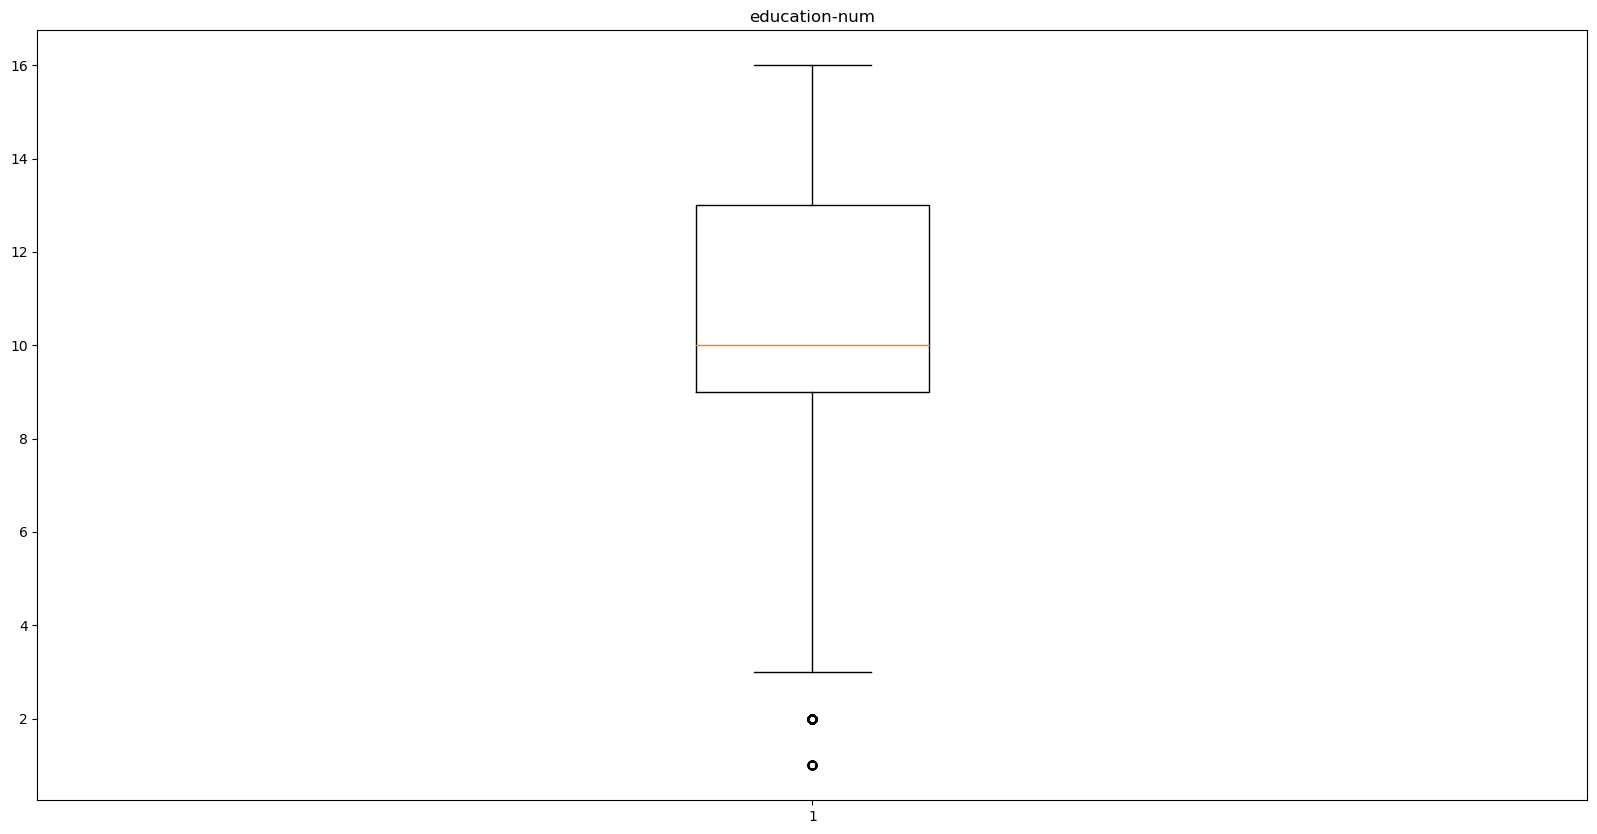

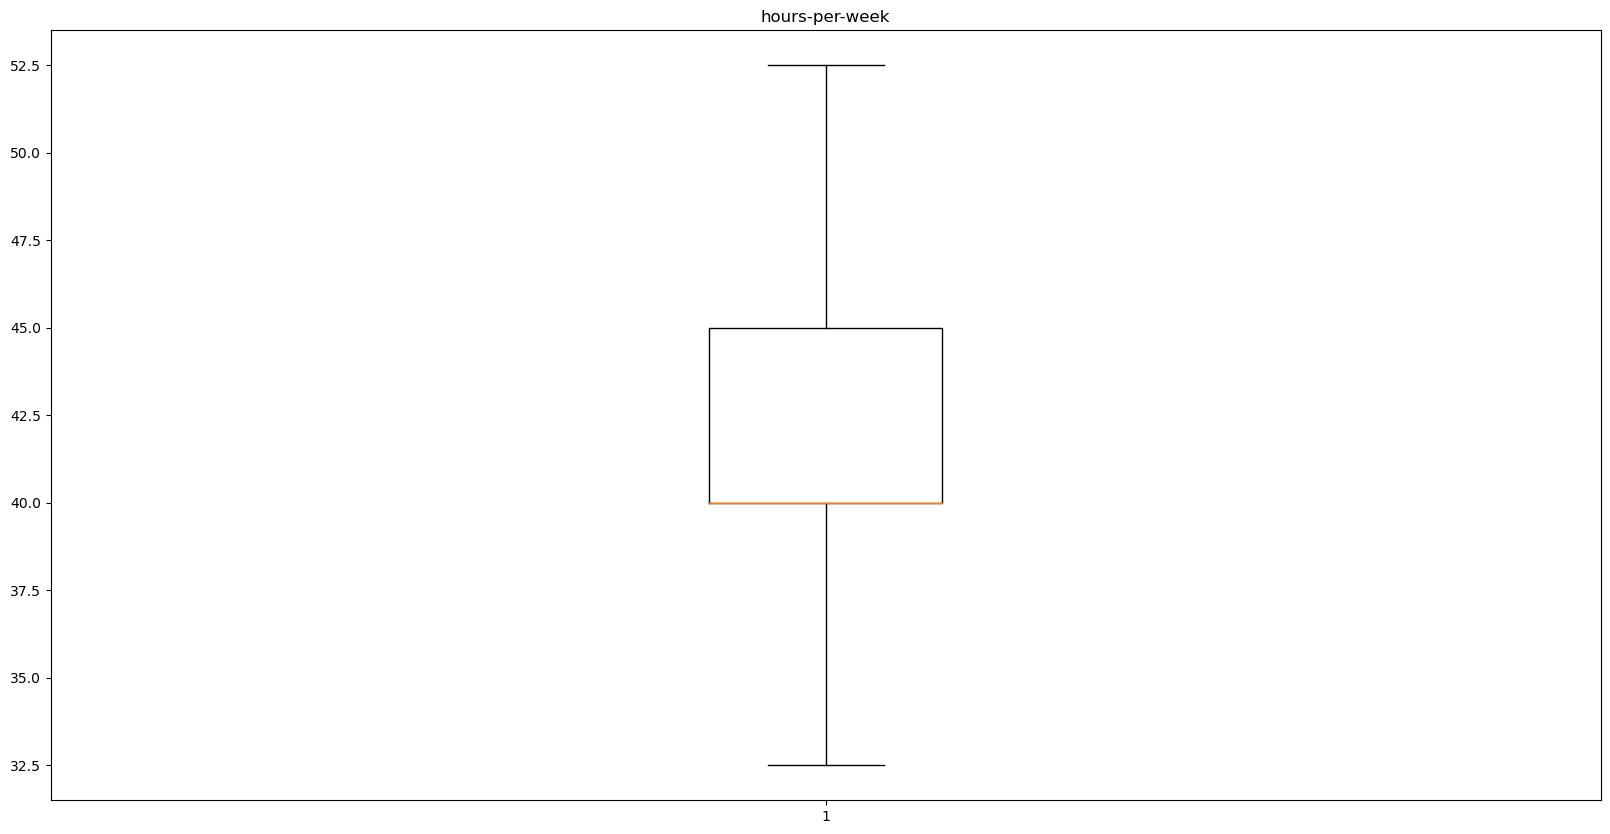

In [52]:
## Boxplots 

# create a list of numerical column names
num_cols = list(df.select_dtypes(include=["float64", "int64"]).columns)

# loop through each numerical column and draw a box plot
for col in num_cols:
    fig, ax = plt.subplots()
    ax.boxplot(df[col])
    ax.set_title(col)
    plt.show()


## Modelling 

## Label encoding

In [53]:
##ENCODING
## Mapping Salary

replace_map = {'salary': { '>50K': 1, '<=50K': 0} }

df.replace(replace_map, inplace=True)


In [54]:
#LABEL ENCODING
#import library
from sklearn.preprocessing import LabelEncoder
#fit the model
label_encoder=LabelEncoder()

In [55]:
for i in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']:  
    df[i]=label_encoder.fit_transform(df[i])
    le_name_mapping =dict((zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print(le_name_mapping)

{'Federal-gov': 0, 'Never-worked': 1, 'Not_classified': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
{'Absent spouse': 0, 'Armforces spouse': 1, 'Divorced': 2, 'Never-married': 3, 'Separated': 4, 'Widowed': 5, 'civilian spouse': 6}
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Not_classified': 7, 'Other-service': 8, 'Priv-house-serv': 9, 'Prof-specialty': 10, 'Protective-serv': 11, 'Sales': 12, 'Tech-support': 13, 'Transport-moving': 14}
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Othe

In [56]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,age_group,hours_group
0,39,6,9,13,3,0,1,4,1,40.0,39,0,30-50,20-40
1,50,5,9,13,6,3,0,4,1,32.5,39,0,30-50,0-20
2,38,3,11,9,2,5,1,4,1,40.0,39,0,30-50,20-40
3,53,3,1,7,6,5,0,2,1,40.0,39,0,50-70,20-40
4,28,3,9,13,6,10,5,2,0,40.0,4,0,10-30,20-40


### Selecting Features

## Best feature selection model 
recursive Feature Elimination (RFE)
SelectKBest
Principal Component Analysis (PCA)
Tree-based feature selection



In [97]:
dfk = df.copy()

In [99]:
from sklearn.feature_selection import SelectKBest, chi2

# specify the number of features to select
num_features = 5

# separate the features and the target variable
X = dfk.drop('salary', axis=1)
y = dfk['salary']

# apply feature selection using chi-squared test
selector = SelectKBest(score_func=chi2, k=num_features)
X_selected = selector.fit_transform(X_train, y_train_binary)

# get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features = X.columns[selected_indices].tolist()

# print the selected features
print("Selected features:", selected_features)


Selected features: ['age', 'education-num', 'marital-status', 'relationship', 'hours-per-week']


## Splitting our data into train and test

In [100]:
X.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'age_group', 'hours_group'],
      dtype='object')

In [57]:
#X = df.drop(['salary','age_group','hours_group'], axis= 1)
X = df[['age', 'education-num', 'marital-status', 'relationship', 'hours-per-week']]
y= df['salary']
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [58]:
X.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country'],
      dtype='object')

## MODELS

In [59]:
# import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [62]:
# define a function to calculate accuracy and classification matrix of multiple models
def calculate_metrics(models, X_train, y_train, X_test, y_test):
    results = []  
    for name, model in models.items(): 
        # fit the model on training data 
        model.fit(X_train, y_train) 
        # make predictions on testing data
        y_pred = model.predict(X_test)
        # calculate accuracy and classification matrix
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results.append((name,acc))
        # print the results
        print(f"Model: {name}")
        print(f"Accuracy: {acc:.4f}")
        print("Confusion matrix")
        print(cm)
        print("---------------")
    # create a dataframe to display the results in a table
    results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
    # sort the results by accuracy in descending order
    results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
    print(results_df)


#creating  a table to tabulate the above given options 

In [65]:
# convert the continuous labels to binary labels
y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# create a dictionary of models to be evaluated
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "lgb_model": LGBMClassifier()
}

# call the function to calculate accuracy and classification matrix for each model
calculate_metrics(models, X_train, y_train_binary, X_test, y_test_binary)


Model: Decision Tree
Accuracy: 0.7547
Confusion matrix
[[3683  700]
 [ 726  705]]
---------------
Model: Random Forest
Accuracy: 0.8025
Confusion matrix
[[3879  504]
 [ 644  787]]
---------------
Model: KNN
Accuracy: 0.8068
Confusion matrix
[[3888  495]
 [ 628  803]]
---------------


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8172
Confusion matrix
[[4026  357]
 [ 706  725]]
---------------
Model: XGBoost
Accuracy: 0.8328
Confusion matrix
[[3965  418]
 [ 554  877]]
---------------
Model: lgb_model
Accuracy: 0.8371
Confusion matrix
[[3980  403]
 [ 544  887]]
---------------
                 Model  Accuracy
5            lgb_model  0.837117
4              XGBoost  0.832817
3  Logistic Regression  0.817165
2                  KNN  0.806846
1        Random Forest  0.802546
0        Decision Tree  0.754730


In [79]:
y_train_binary

8575     0
19024    0
948      0
19579    0
25567    0
        ..
23644    0
5535     0
868      1
16984    0
26112    0
Name: salary, Length: 23255, dtype: int32

Now we will tune hyperparamters of First two of the above models using Both randomized search cv and Grid SearchCv
Whichever performs better will be applied on other models

## Hyperparameter Tuning using RandomizedSearchCV

### On LGBM Classifier

In [75]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7]
}

# Create the XGB classifier
lgbm = LGBMClassifier()

# Perform randomized search with cross-validation

random_search = RandomizedSearchCV(estimator = lgbm,  param_distributions=param_grid,n_iter=100, cv=5, n_jobs=-1, random_state=42)


# Fit the random search to the data
random_search.fit(X_train, y_train_binary)  # Replace X and y with your feature matrix and target vector

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [76]:
# Train a new LGBMClassifier with the best hyperparameters on the entire training dataset
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train, y_train_binary)

# Predict on the test dataset and calculate accuracy
from sklearn.metrics import accuracy_score

# Predict on the test dataset using the best_model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.8385


### On XGB Classifier

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7]
}

# Create the XGB classifier
xgb = XGBClassifier()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train_binary)  # Replace X and y with your feature matrix and target vector

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [78]:
# Train a new LGBMClassifier with the best hyperparameters on the entire training dataset
xgb = XGBClassifier(**best_params)

# Predict on the test dataset and calculate accuracy
from sklearn.metrics import accuracy_score

# Predict on the test dataset using the best_model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.8368


As we can see paramter tuning using gridsearchCV the accuracy has not improved much.

## Hyperparameter Tuning using GridSearchCV

### On LGBM Classifier

In [80]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

lgbm = LGBMClassifier()


In [81]:
# Create GridSearchCV object
grid_search = GridSearchCV(lgbm, param_grid, cv=5)  # You can specify the number of cross-validation folds (cv) as desired

# Fit the grid search to the data
grid_search.fit(X_train, y_train_binary)  # Replace X and y with your data

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [82]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Train a new LGBMClassifier with the best hyperparameters on the entire training dataset
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train, y_train_binary)

# Predict on the test dataset and calculate accuracy
y_pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.8383


### On XGBClassifier

In [83]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Create an XGBClassifier object
xgb = XGBClassifier()


In [84]:

# Create GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5)  # You can specify the number of cross-validation folds (cv) as desired

# Fit the grid search to the data
grid_search.fit(X_train, y_train_binary)  # Replace X_train and y_train with your training data

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [85]:

# Train a new XGBClassifier with the best hyperparameters on the entire training dataset
xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train_binary)

# Predict on the test dataset and calculate accuracy
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.8395


As we observe both the methods randomsearch and grid searchCV do not show drastic improvement in the accuracy of models.
We will move ahead with random search because it provides better results in both cases.Also random search is faster than grid searchCV

## Hyperparameter Tuning using RandomizedSearchCV applied on each model

#### Hyperparameter TuningRandomizedSearchCV applied on logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# define the hyperparameter grid
param_grid = {
    'penalty': ['l2','none'],
    'fit_intercept': [True, False]
}

log = LogisticRegression()

In [87]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=log, param_distributions=param_grid,n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X, y)  # Replace X and y with your feature matrix and target vector

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After obtaining the best hyperparameters from the RANDOMSearchCV, you can use them to train a LogisticRegression()model on the entire training dataset 

In [88]:
# Train the same model with the best hyperparameters on the entire training dataset
log = LogisticRegression(**best_params)
log.fit(X_train, y_train_binary)

# Predict on the test dataset and calculate accuracy
y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.8172


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Hyperparameter TuningRandomizedSearchCV applied on KNeighborsClassifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint

# define the hyperparameter grid
param_grid = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn = KNeighborsClassifier()

In [90]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid,n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X, y)  # Replace X and y with your feature matrix and target vector

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


After obtaining the best hyperparameters from the RANDOMSearchCV, you can use them to train a LogisticRegression()model on the entire training dataset 

In [91]:
# Train the same model with the best hyperparameters on the entire training dataset
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train_binary)

# Predict on the test dataset and calculate accuracy
y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.8172


#### Hyperparameter TuningRandomizedSearchCV applied on  DecisionTreeClassifier()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint

# define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt = DecisionTreeClassifier()

In [93]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X, y)  # Replace X and y with your feature matrix and target vector

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [94]:
# Train the same model with the best hyperparameters on the entire training dataset
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train_binary)

# Predict on the test dataset and calculate accuracy
y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.8172


After hyper parameter tuning,we have observed that XGB Classifier has highest accuracy followed by LGBM classifier.
decision tree,KNN and logistic regression all other have same 0.8172 accuracy 